## INST 447 Lab 08
### Taner Bulbul

# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 11: Data Cleaning - Level ⅠⅡ 
#### Exercises

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Exercise 1
In this exercise, we will be using 'Temperature_data.csv'. This dataset has some missing values. Do the following.

    a. After reading the file into a Pandas DataFrame, check if the dataset is level Ⅰ clean and if not clean it. Also, describe the cleanings if any.

The dataset has a unique index (default panads index). It has a column name which is not codeable ('Provisional or ratified'). Before doing all that I will first check the unique values in the columns and see if they are needed or not.

In [392]:
day_df = pd.read_csv('Temperature_data.csv')
day_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,RI2,TMP,1/1/2019 0:00,9.0,oC,P
1,RI2,TMP,2/1/2019 0:00,6.0,oC,P
2,RI2,TMP,3/1/2019 0:00,5.0,oC,P
3,RI2,TMP,4/1/2019 0:00,4.0,oC,P
4,RI2,TMP,5/1/2019 0:00,5.0,oC,P


In [393]:
print(day_df.Site.unique())
print(day_df.Species.unique())
print(day_df.Units.unique())
print(day_df['Provisional or Ratified'].unique())

['RI2']
['TMP']
['oC']
['P']


Site, Species, Units and 'Provisional or Ratified' columns have only one value and they are redundant. The information can be reflected in the dataframe name or in the column names. We can drop these columns. We can also rename 'Value' column to be more meaningful to 'Temp_Celsius'. 'ReadingDateTime' column can also be renamed as 'Datetime'


In [394]:
RI2_prov_species_df = day_df.drop(columns=['Site','Species','Units','Provisional or Ratified'])
RI2_prov_species_df.rename(columns= {'Value':'Temp_Celsius','ReadingDateTime':'Datetime'}, inplace=True)
RI2_prov_species_df

,Datetime,Temp_Celsius
0,1/1/2019 0:00,9.0
1,2/1/2019 0:00,6.0
2,3/1/2019 0:00,5.0
3,4/1/2019 0:00,4.0
4,5/1/2019 0:00,5.0
...,...,...
360,27/12/2019 00:00,8.0
361,28/12/2019 00:00,9.0
362,29/12/2019 00:00,8.0
363,30/12/2019 00:00,7.0


    b. Check if the dataset is level Ⅱ clean and if not clean it. Also, describe the cleanings if any.

Datetime formating is confusing and not consistent. We can convert it to datetime object and separate the month, day, year and day name to separate columns so it is clear if it is m/d/y or d/m/y format. We can drop the year and also reoder the columns in a more intuitive order. Change months from numbers to names of months. Some of these are level I cleaning but we couldn't do this until formating datetime first. Rename the dataframe with 2019 as well as all the data is for year 2019.

In [395]:
RI2_prov_species_df.Datetime = pd.to_datetime(RI2_prov_species_df.Datetime,
format='%d/%m/%Y %H:%M')

In [397]:
def extractDMY(r):
    r['Day'] = r.Datetime.day
    r['Month'] = r.Datetime.strftime("%B")
    r['Year'] = r.Datetime.year
    r['weekday'] = r.Datetime.day_name()
    return r
RI2_prov_species_df = RI2_prov_species_df.apply(extractDMY,axis=1)
RI2_prov_species_df

,Datetime,Temp_Celsius,Day,Month,Year,weekday
0,2019-01-01,9.0,1,January,2019,Tuesday
1,2019-01-02,6.0,2,January,2019,Wednesday
2,2019-01-03,5.0,3,January,2019,Thursday
3,2019-01-04,4.0,4,January,2019,Friday
4,2019-01-05,5.0,5,January,2019,Saturday
...,...,...,...,...,...,...
360,2019-12-27,8.0,27,December,2019,Friday
361,2019-12-28,9.0,28,December,2019,Saturday
362,2019-12-29,8.0,29,December,2019,Sunday
363,2019-12-30,7.0,30,December,2019,Monday


In [398]:
#check if the year values
RI2_prov_species_df.Year.unique()

array([2019], dtype=int64)

In [400]:
#Since only 2019 is there, we can drop the year column
RI2_prov_species_2019_df = RI2_prov_species_df.drop(columns='Year')
#reorder columns to be more intuitive
RI2_prov_species_2019_df = RI2_prov_species_2019_df[['Datetime','Month','Day','weekday','Temp_Celsius']]
RI2_prov_species_2019_df.head()

,Datetime,Month,Day,weekday,Temp_Celsius
0,2019-01-01,January,1,Tuesday,9.0
1,2019-01-02,January,2,Wednesday,6.0
2,2019-01-03,January,3,Thursday,5.0
3,2019-01-04,January,4,Friday,4.0
4,2019-01-05,January,5,Saturday,5.0


    c.	The dataset has missing values. See how many, and run diagnosis to see what types of missing values they are. 

In [401]:
RI2_prov_species_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datetime      365 non-null    datetime64[ns]
 1   Month         365 non-null    object        
 2   Day           365 non-null    int64         
 3   weekday       365 non-null    object        
 4   Temp_Celsius  351 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 14.4+ KB


In [402]:
print('Number of missing values:')
for col in RI2_prov_species_2019_df.columns:
    n_MV = sum(RI2_prov_species_2019_df[col].isna())
    print('{}:{}'.format(col,n_MV))

Number of missing values:
Datetime:0
Month:0
Day:0
weekday:0
Temp_Celsius:14


We see that temp_celsius column is missing 14 values. Below we look for the relation between the missing temperature and month, day and weekday. From the graphs and p-values (from the chi2 test) we see a relation  between the month and the missing temperature values but no relation between the day and weekday and missing temperature values. Months with missing temepartures are December being the most missing values and then january and june. These are 6 months apart but not correlating to the same days of the months. We could classify the missing values as missing at random MAR for the month and MCAR for day and weekday.

In [403]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Month:


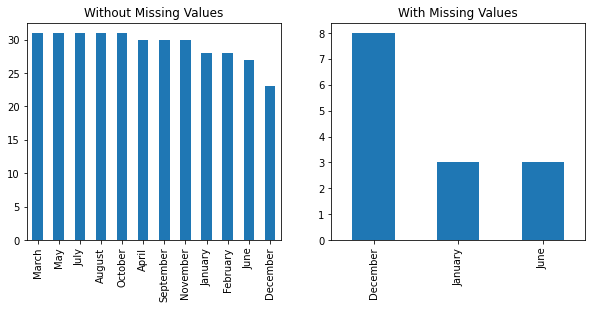

p-value of Chi_squared test: 2.7868163646037645e-08
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Day:


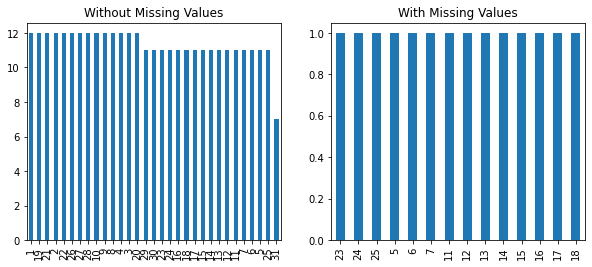

p-value of Chi_squared test: 0.9717076579239342
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


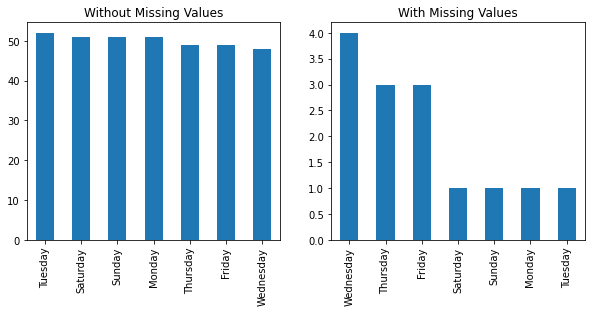

p-value of Chi_squared test: 0.5129366081264113
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [167]:
categorical_attributes = ['Month', 'Day','weekday']

BM_MV = RI2_prov_species_2019_df.Temp_Celsius.isna()
for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(RI2_prov_species_2019_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

    d. Are there any outliers in the dataset?

In part (e) below I showed the box plots and February, June, July and December shows outliers which are identified using the upper and lower cap of boxplot and printed below.

In [404]:
month_poss = RI2_prov_species_2019_df.Month.unique()
for poss in month_poss:
    BM = RI2_prov_species_2019_df.Month == poss
    data = RI2_prov_species_2019_df[BM]['Temp_Celsius']
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    BM = (data > (Q3+1.5 *IQR)) | (data < (Q1-1.5 *IQR) )
    if len(data[BM]):
        print("Outlier Temps in " + poss +":")
        for i in range(len(data[BM])):
            print(data[BM].values[i])

Outlier Temps in February:
2.0
3.0
3.0
Outlier Temps in June:
26.0
Outlier Temps in July:
28.0
Outlier Temps in December:
3.0


    e.	How should we best deal with the missing values if our goal is to draw multiple boxplots that show the central tendency and variation of temperature across the months? Draw the described visualization after dealing with the missing values. 

Missing values are MAR for the 3 months, only 3 values are missng in June and January and 8 values are missing in December and we are asked to do a boxlplot where NaN values would cause an issue. We can fill these values imputing and replacing with a central tendecy (e.g. mean) because they don't have many outliers.

In [405]:
month_miss = ['December','January','June']
month_mean={}
for m in month_miss:
    BM = RI2_prov_species_2019_df.Month == m
    month_mean[m] = RI2_prov_species_2019_df[BM]['Temp_Celsius'].mean()
    
for t in range(0,len(RI2_prov_species_2019_df.index)):
    if np.isnan(RI2_prov_species_2019_df.Temp_Celsius[t]):
        RI2_prov_species_2019_df.at[t,'Temp_Celsius'] = month_mean[RI2_prov_species_2019_df.Month[t]]

RI2_prov_species_2019_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datetime      365 non-null    datetime64[ns]
 1   Month         365 non-null    object        
 2   Day           365 non-null    int64         
 3   weekday       365 non-null    object        
 4   Temp_Celsius  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 14.4+ KB


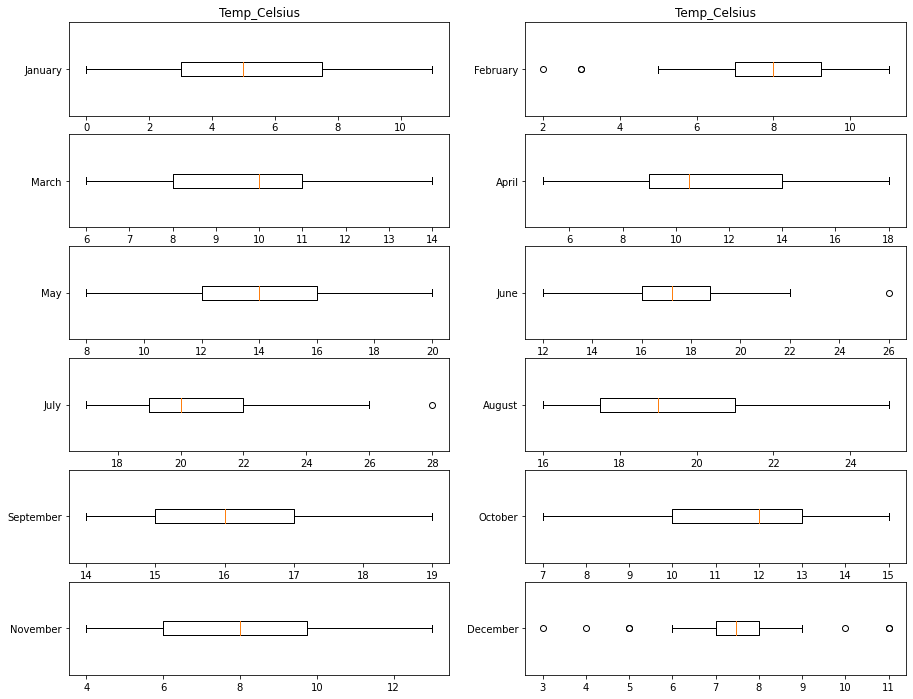

In [406]:
month_poss = RI2_prov_species_2019_df.Month.unique()
plt.figure(figsize=(15,12))
for i, poss in enumerate(month_poss):
    BM = RI2_prov_species_2019_df.Month == poss
    data = RI2_prov_species_2019_df[BM]['Temp_Celsius']
    plt.subplot(6,2,i+1) #plot a 6 by 2 subplots
    plt.boxplot(data,vert=False)
    if i == 0 or i == 1: # title only top two plots
        plt.title('Temp_Celsius')
    plt.yticks([1],[poss])
    
plt.show()

Once we filled missing values with mean values. Outliers also changed. It is expected especially in December because December had 8 missing values.

In [408]:
month_poss = RI2_prov_species_2019_df.Month.unique()
for poss in month_poss:
    BM = RI2_prov_species_2019_df.Month == poss
    data = RI2_prov_species_2019_df[BM]['Temp_Celsius']
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    BM = (data > (Q3+1.5 *IQR)) | (data < (Q1-1.5 *IQR) )
    if len(data[BM]):
        print("Outlier Temps in " + poss +":")
        for i in range(len(data[BM])):
            print(data[BM].values[i])

Outlier Temps in February:
2.0
3.0
3.0
Outlier Temps in June:
26.0
Outlier Temps in July:
28.0
Outlier Temps in December:
5.0
3.0
5.0
4.0
11.0
10.0
11.0


# Exercise 3
In this exercise, we will be using ‘imdb_top_1000.csv’. More information about this dataset maybe found on this link: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows. Perform the following steps for this dataset. 

    a.	Read the file into movie_df, and list the level Ⅰ data cleaning steps that the dataset needs. Implement the listed items, if any. 

In [409]:
movie_df = pd.read_csv('imdb_top_1000.csv')
movie_df.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [411]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Columns are codeable, no redundant (non-unique) value columns. It has the default unique index. It doesn't seem to need any level I cleaning at this point.

    b.	We want to employ a Decision Tree Classificaiton algorithm using the following columns to predict the IMDB_rating: Certificate, Runtime, Genre, and Gross. For this analytics goals, list the level 2 data cleanings that need to be done, and then implement them.  

As part of level 2 cleaning, Runtime has a unit as 'min'. We can remove the 'min' and convert the values to an integer instead of string for easier predictive analysis. Rename column from 'Runtime' to 'Runtime_min'. Also format and convert 'Gross' column values to float for numerical analysis.

All the columns for dependent variable (IMDB_rating) and independent variables (Certificate, Runtime, Genre, and Gross) are already in the dataset. Certificate and Gross columns have some missing values but it is part of Level 3 cleaning. I don't see any column that needs to be unpacked (e.g. datetime).  
We can drop the columns we won't use as part of our level 2 cleaning. We can also reorder the columns to make it dependent and independent variables to make it intuitive for our predictive analysis.

In [412]:
movie_df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [413]:
movie_df.drop(columns =['Poster_Link', 'Series_Title', 'Released_Year',
        'Overview', 'Meta_score', 'Director','Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes'], inplace=True)
#rearrange columns in a more intuitive order.
movie_df = movie_df[['IMDB_Rating','Certificate','Runtime','Genre','Gross']]
#remove 'min' and convert runtime to integers
movie_df.Runtime = [ int(r[:len(r)-3]) for r in movie_df.Runtime]
#rename 'Runtime' to 'Runtime_min'
movie_df.rename(columns = {'Runtime':'Runtime_min'}, inplace = True)
#convert Gross values to float
movie_df.Gross = [ str(r).replace(',', '') for r in movie_df.Gross]
movie_df.Gross = [float(g) for g in movie_df.Gross]
movie_df.head(2)

,IMDB_Rating,Certificate,Runtime_min,Genre,Gross
0,9.3,A,142,Drama,28341469.0
1,9.2,A,175,"Crime, Drama",134966411.0


In [414]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDB_Rating  1000 non-null   float64
 1   Certificate  899 non-null    object 
 2   Runtime_min  1000 non-null   int64  
 3   Genre        1000 non-null   object 
 4   Gross        831 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


    c.	Does the dataset have issues, regarding missing values? If yes, how best should we deal with them given the listed data analytic goals in b. 

Data has missing value in Certificate and Gross columns. We can use a heatmap to see how the missing values are scattered. We see that missing values in the Genre and Certifcate attribues are scattered but we need to also do an analysis per attribute to see the relationships of the attributes Gross and Certificate and the dependent variable IMDB_Rating. Analysis of all attributes are shown below. Based on the p-values of Gross and IMDB_Rating and Certifcate and IMDB_rating being larger than 0.05 ( 0.546 and 0.498 respectively), we can qualify the missing values as MCAR, missing values aren't causing a significatnt impact on the IMDB_Rating.

In [416]:
print('Number of missing values:')
for col in movie_df.columns:
    n_MV = sum(movie_df[col].isna())
    print('{}:{}'.format(col,n_MV))

Number of missing values:
IMDB_Rating:0
Certificate:101
Runtime_min:0
Genre:0
Gross:169


In [417]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDB_Rating  1000 non-null   float64
 1   Certificate  899 non-null    object 
 2   Runtime_min  1000 non-null   int64  
 3   Genre        1000 non-null   object 
 4   Gross        831 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


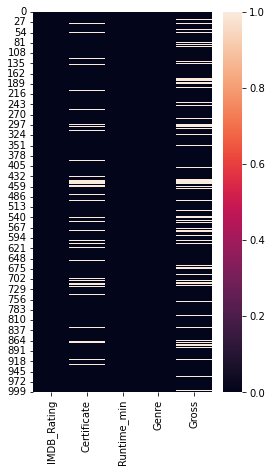

In [418]:
#patient_df = pd.read_csv('kidney_disease.csv')
plt.figure(figsize=(4,7))
sns.heatmap(movie_df.isna())
plt.show()

Copy the code from the book for analyzing numerical attributes. Diagnose_MV_Categorical function was defined above in exercise 1 alredy.

In [419]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
 
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))

Analysis for IMDB_Rating:


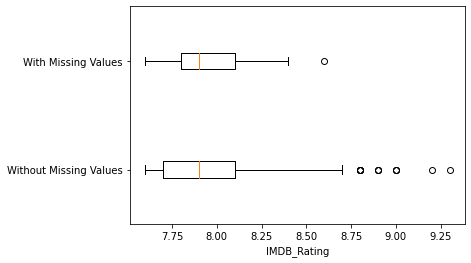

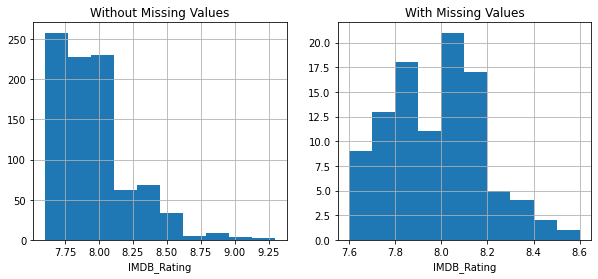

p-value of t-test: 0.498172588890191
- - - - - - - - - divider - -  - - - - - - 
Analysis for Runtime_min:


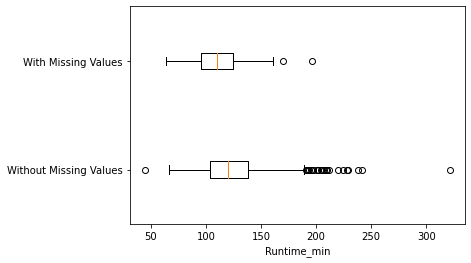

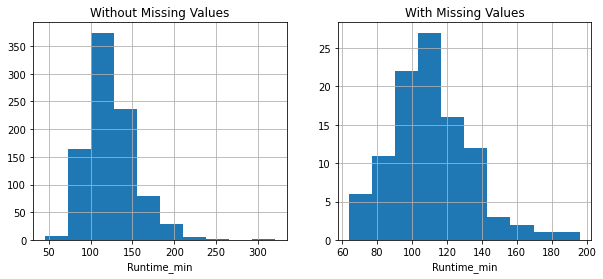

p-value of t-test: 9.09759014968817e-06
- - - - - - - - - divider - -  - - - - - - 
Analysis for Gross:


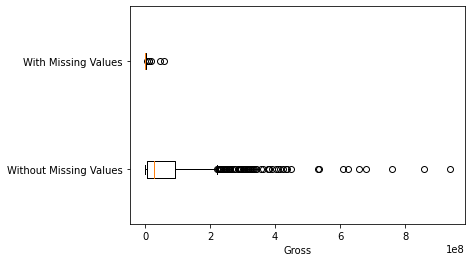

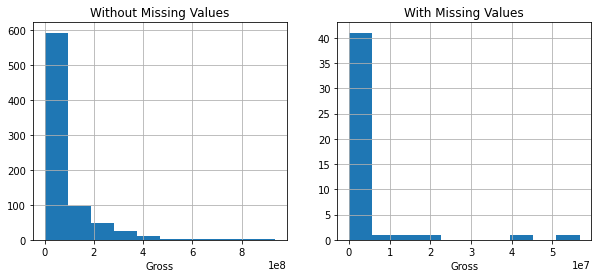

p-value of t-test: 3.94637447134404e-05
- - - - - - - - - divider - -  - - - - - - 
Analysis for Genre:


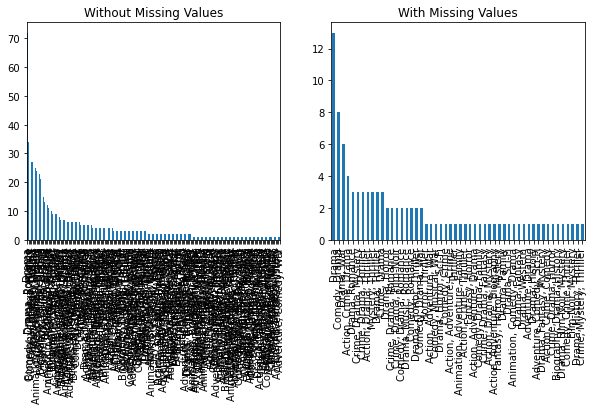

p-value of Chi_squared test: 0.0008956015342417438
- - - - - - - - - divider - - - - - - - - - 


In [420]:
categorical_attributes = ['Genre']
numerical_attributes = ['IMDB_Rating','Runtime_min','Gross']

BM_MV = movie_df.Certificate.isna()
for att in numerical_attributes:
    print('Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(movie_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(movie_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Analysis for IMDB_Rating:


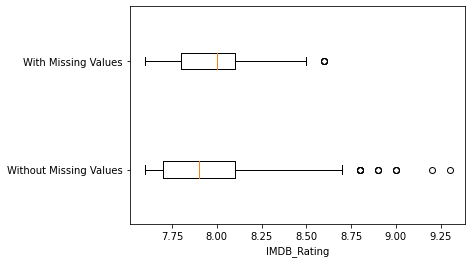

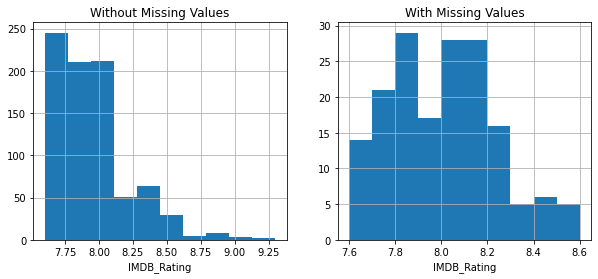

p-value of t-test: 0.5468451640685111
- - - - - - - - - divider - -  - - - - - - 
Analysis for Runtime_min:


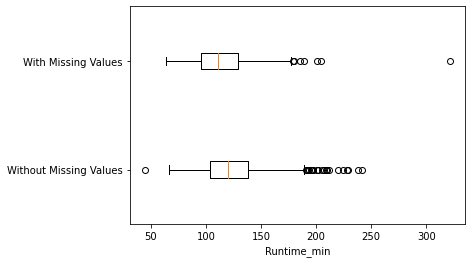

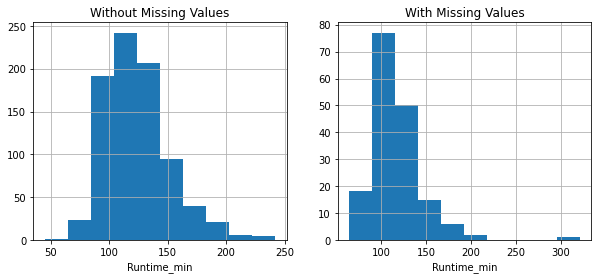

p-value of t-test: 0.0030009565109990984
- - - - - - - - - divider - -  - - - - - - 
Analysis for Certificate:


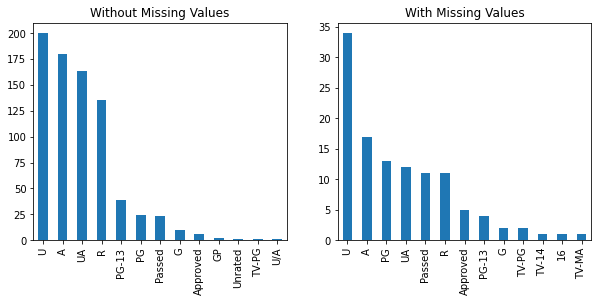

p-value of Chi_squared test: 3.486171115236579e-11
- - - - - - - - - divider - - - - - - - - - 
Analysis for Genre:


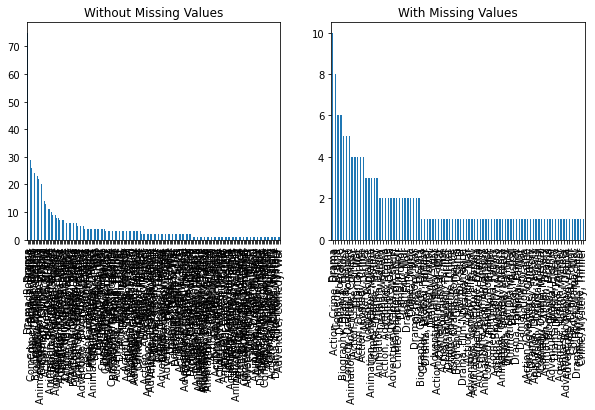

p-value of Chi_squared test: 0.0027345863264551062
- - - - - - - - - divider - - - - - - - - - 


In [421]:
categorical_attributes = ['Certificate','Genre']
numerical_attributes = ['IMDB_Rating','Runtime_min']

BM_MV = movie_df.Gross.isna()
for att in numerical_attributes:
    print('Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(movie_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(movie_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

In [67]:
movie_df.columns

Index(['IMDB_Rating', 'Certificate', 'Runtime_min', 'Genre', 'Gross'], dtype='object')

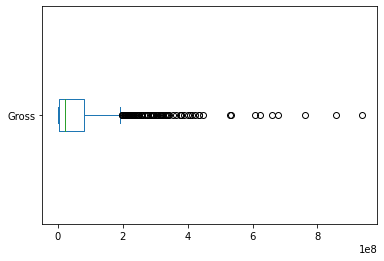

In [68]:
numerical_attributes = ['Gross']
for att in numerical_attributes:
    movie_df[att].plot.box(vert=False)
    plt.show()

In [422]:
#fille na Gross (numerical) values with median
movie_df.Gross.fillna(movie_df.Gross.median(),inplace=True)
#fill Certifiacte (categorical) na values with mode
movie_df.Certificate.fillna(movie_df.Certificate.mode()[0],inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDB_Rating  1000 non-null   float64
 1   Certificate  1000 non-null   object 
 2   Runtime_min  1000 non-null   int64  
 3   Genre        1000 non-null   object 
 4   Gross        1000 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


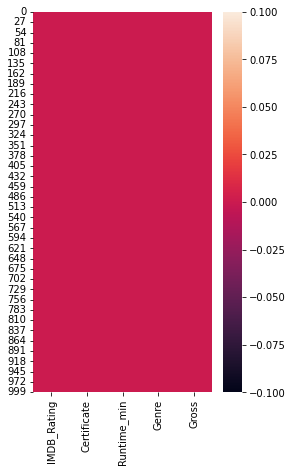

In [423]:
plt.figure(figsize=(4,7))
sns.heatmap(movie_df.isna())
plt.show()

    d.	Use the following function from sklearn.tree to create a prediction model that can predict IMDB_rating using Certificate, Runtime, Genre and Gross: 
    
*DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter='random')*

    The tuning parameters have been set for you so the DecsionTreeRegressor can perform better. Once the model is trained draw the trained tree and check if the attribute Gross is used for the prediction of IMDB_rating. 

Looking at the tree graph (need to enlarge to see thegraph to see), I don't see 'Gross' is being used in the prediction.

In [424]:
from sklearn.tree import DecisionTreeRegressor
predictors = ['Certificate','Genre','Runtime_min', 'Gross']
target = 'IMDB_Rating'
# for categorical columns Certificate and Genre, need to convert to to some
#encoding using pandas get_dummies which does one hot encoding
Xs = pd.get_dummies(movie_df[predictors])
y= movie_df[target]
RegressTree = DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter='random')
RegressTree.fit(Xs, y)

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0,
                      min_samples_split=20, splitter='random')

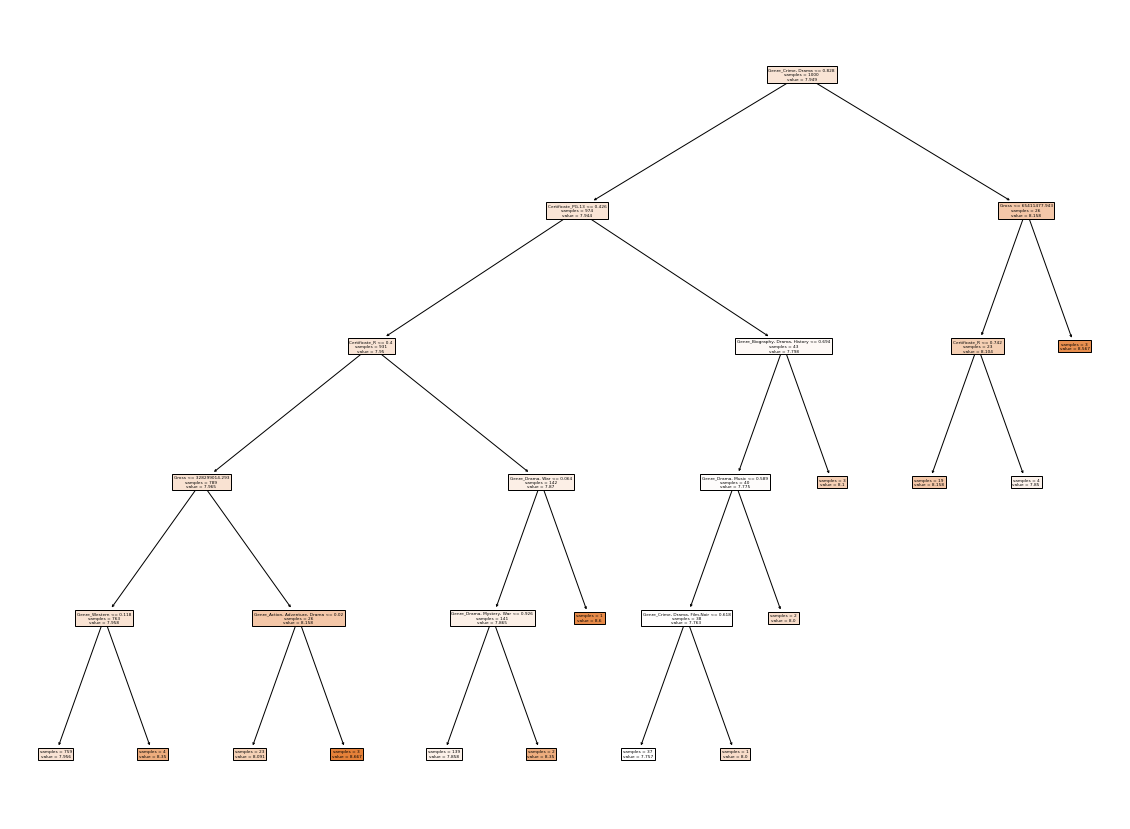

In [425]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(RegressTree, 
          feature_names=Xs.columns,  
          class_names= y.unique(),
          filled=True,
          impurity=False)
plt.show()

e.	Run the following code and then explain what summary_df is.

summary_df is a 3 column dataframe. First column is the predicted IMDB_rating from the DecisionTreeRegressor model, second column is the average (mean) of the predicted IMDB_ratings and last column is tyhe actual IMDB_rating from the original data.

In [426]:
dt_predicted_IMDB_rating = RegressTree.predict(Xs)
mean_predicted_IMDB_rating = np.ones(len(y))*y.mean()
summary_df = pd.DataFrame({'Prediction by Decision Tree': dt_predicted_IMDB_rating,
            'Prediction by mean': mean_predicted_IMDB_rating, 'Actual IMDB_rating': y})
summary_df.head()

,Prediction by Decision Tree,Prediction by mean,Actual IMDB_rating
0,7.956258,7.9493,9.3
1,8.566667,7.9493,9.2
2,8.091304,7.9493,9.0
3,8.157895,7.9493,9.0
4,8.157895,7.9493,9.0


    f.	Run the following code and explain the visualizaiton it creates. What can you learn from the visualization? 

It is a heatmap of the error from the decison tree modeling and the error between the prediction and actual rating value. Decison tree errors have some darker lines which shows that there are bigger errors on the decision tree than the mean error at some data points but overall the grading of the color (error size) between the prediction error and mean error are folloing each other. Mean erro heat map is smoother as the mean value is fixed.

<AxesSubplot:>

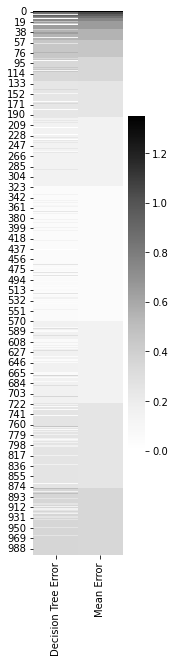

In [428]:
summary_df['Decision Tree Error'] = abs(summary_df['Prediction by Decision Tree']- summary_df['Actual IMDB_rating'])
summary_df['Mean Error'] = abs(summary_df['Prediction by mean'] - summary_df['Actual IMDB_rating'])
plt.figure(figsize=(2,10))
table = summary_df[['Decision Tree Error','Mean Error']]
sns.heatmap(table, cmap='Greys')

# Exercise 4
In this exercise, we will be using two CSV files: responses.csv and columns.csv. The two files are used to record the date of a survey conducted in Slovakia. To access the data on Kaggle.com use this link: https://www.kaggle.com/miroslavsabo/young-people-survey. Perform the following items for this data source. 

In [429]:
column_df = pd.read_csv('columns.csv')
column_df.head(2)

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs


In [430]:
response_df = pd.read_csv('responses.csv')
response_df.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


    a.	Are there respondents in this survey that are suspected to be outliers based on their age? How many? list them in a separate data frame.

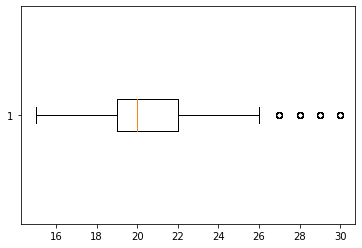

In [431]:
#Visually take a look at the outliers in Age column
fig = plt.boxplot(response_df.Age.dropna(),vert=False)

In [432]:
fig['fliers'][0].get_data()[0]
print('There are',len(fig['fliers'][0].get_data()[0]), 'outliers in Age column')

There are 52 outliers in Age column


In [433]:
#New dataframe wityh only Age outliers
Q1 = response_df.Age.quantile(0.25)
Q3 = response_df.Age.quantile(0.75)
IQR = Q3-Q1

BM = (response_df.Age > (Q3+1.5 *IQR)) | (response_df.Age < (Q1-1.5 *IQR))
age_outlier_df = response_df[BM]
print(age_outlier_df.shape)
age_outlier_df.head()

(52, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
33,5.0,4.0,2.0,2.0,3.0,4.0,5.0,4.0,3.0,1.0,...,27.0,170.0,70.0,1.0,female,right handed,masters degree,no,city,block of flats
45,5.0,4.0,5.0,2.0,2.0,4.0,3.0,5.0,4.0,1.0,...,27.0,181.0,78.0,1.0,male,right handed,masters degree,no,NaN,block of flats
72,5.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,...,28.0,168.0,52.0,1.0,female,right handed,secondary school,no,city,block of flats
186,4.0,2.0,2.0,4.0,2.0,3.0,3.0,4.0,2.0,1.0,...,29.0,169.0,65.0,2.0,female,right handed,masters degree,no,city,block of flats
191,5.0,3.0,2.0,5.0,2.0,4.0,5.0,5.0,2.0,1.0,...,29.0,160.0,67.0,2.0,female,right handed,masters degree,no,village,house/bungalow


    b.	Are there respondents in this survey that are suspected to be outliers based on their level of liking for Country and Hardrock music? How many? list them in a separate data frame.

These attributes are numerical and I will check the scatter plot first but it is hard to say which ones are outliers here from the scatter plot. Is someone likes country a lot (5) and hates hardrock (1) is an outlier? Or someone likes both very much is anoutlier? It is not possible to count them from this scatter plot either. I will treat the values as categorical and check their value_counts and also look at a crosstab to see the outliers.

<AxesSubplot:xlabel='Country', ylabel='Metal or Hardrock'>

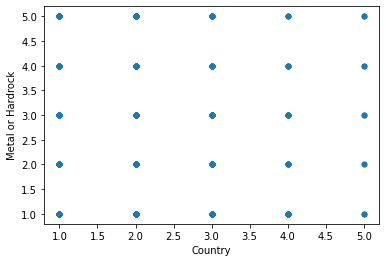

In [434]:
response_df.plot.scatter(x='Country',y='Metal or Hardrock')

In [435]:
response_df['Country'].value_counts()

2.0    346
1.0    343
3.0    198
4.0     85
5.0     33
Name: Country, dtype: int64

In [436]:
response_df['Metal or Hardrock'].value_counts()

1.0    384
2.0    219
3.0    164
4.0    136
5.0    104
Name: Metal or Hardrock, dtype: int64

In [437]:
cr = pd.crosstab(response_df['Country'],response_df['Metal or Hardrock'])
cr

Metal or Hardrock,1.0,2.0,3.0,4.0,5.0
Country,,,,,
1.0,154,58,51,41,38
2.0,135,89,49,45,27
3.0,63,49,37,27,21
4.0,25,16,19,15,10
5.0,7,5,7,7,7


<AxesSubplot:xlabel='Metal or Hardrock', ylabel='Country'>

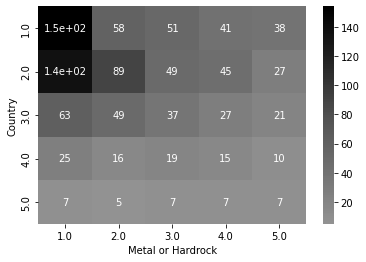

In [438]:
cont_table = pd.crosstab(response_df['Country'],response_df['Metal or Hardrock'])
sns.heatmap(cont_table,annot=True, center=0.5 ,cmap="Greys")

I can take the last row here as outliers and create a new dataframe. People likes the country music very much and likes the hardrock are the outliers.

In [439]:
#Count the last row as outliers
outliers = [(cr[i][5]) for i in range(1,6)]
print("Outlier count =",sum(outliers))


Outlier count = 33


We can see the count of outlier_df ros is 33 matches the outliers we identified

In [440]:
BM1 = response_df['Country'] == 5.0
BM2 = response_df['Metal or Hardrock'] >= 1.0
BM = BM1 & BM2
outlier_df = response_df[BM]
print(response_df[BM].shape) 
outlier_df.head()

(33, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
41,5.0,4.0,5.0,5.0,5.0,5.0,1.0,1.0,4.0,5.0,...,20.0,188.0,80.0,3.0,male,right handed,college/bachelor degree,no,city,block of flats
52,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,21.0,160.0,58.0,2.0,female,right handed,secondary school,no,village,block of flats
62,5.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,...,23.0,189.0,81.0,2.0,male,right handed,secondary school,no,city,block of flats
85,5.0,2.0,3.0,3.0,5.0,5.0,3.0,3.0,4.0,4.0,...,22.0,159.0,53.0,2.0,male,right handed,college/bachelor degree,no,city,block of flats
93,5.0,4.0,1.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,...,24.0,175.0,80.0,2.0,male,right handed,masters degree,no,village,house/bungalow


	c. Are there respondents in this survey that are suspected to be outliers based on their BMI or Education level? How many? list them in a separate data frame. BMI can be calculated using the following formula. 
    
`BMI=Weight/Height^2`

    The Weight has to be in kilograms and height in meters for the following formula. In the dataset, Weight is recorded in kilograms but Height is recorded in centimeters and has to be transformed to Meter.


In [441]:
#Add a new column for BMI using the formula above
response_df['BMI']= response_df.Weight/((response_df.Height/100)**2)
response_df.shape

(1010, 151)

<AxesSubplot:xlabel='BMI', ylabel='Education'>

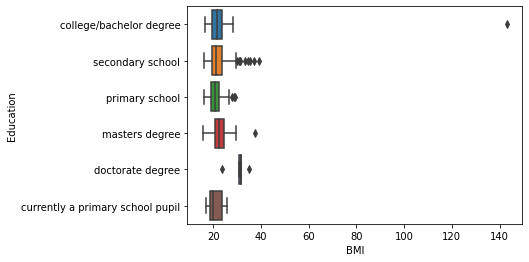

In [442]:
sns.boxplot(x=response_df.BMI,y=response_df.Education)

Outliers are shown below. There are 16 outliers and each education category and BMI value are put in a new dataframe and response dataframe with the outliers are alsoshown below.

In [443]:
#https://www.kaggle.com/code/hgultekin/box-plots-finding-all-outliers
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

outliers_list = [] #empty list
#iterate each education categiry, find the education and BMI outlier
#and add the dataframe with outliers to the list
for i in response_df.copy().Education.unique():
    df_outlier = response_df.copy().sort_values(['Education'])
    df_outlier = df_outlier.loc[df_outlier['Education'] == i, :].reset_index(drop=True)
    df_outlier = df_outlier[['Education', 'BMI']].set_index('Education').apply(box_outliers)
    df_outlier = df_outlier.reset_index()
    outliers_list.append(df_outlier)

#create a dataframe from the list of outliers
outliers_df = pd.concat(outliers_list)
outliers_df.reset_index(drop=True)

,Education,BMI
0,college/bachelor degree,143.080125
1,secondary school,31.141869
2,secondary school,33.145212
3,secondary school,39.183673
4,secondary school,34.626039
5,secondary school,35.444234
6,secondary school,31.141869
7,secondary school,29.961612
8,secondary school,30.864198
9,secondary school,37.182261


In [445]:
#get the new resonse dataframe with the ouliers
BM = [False] * len(response_df)
for i in range(0,len(outliers_df)):
        BM = BM | (response_df.Education == outliers_df.iloc[i].Education) & (response_df.BMI == outliers_df.iloc[i].BMI)
print(response_df[BM].shape)
response_df[BM].head()

(16, 151)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,BMI
42,5.0,5.0,2.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,...,170.0,90.0,0.0,female,right handed,secondary school,yes,city,block of flats,31.141869
131,5.0,4.0,3.0,1.0,1.0,2.0,2.0,4.0,2.0,1.0,...,193.0,103.0,2.0,male,right handed,primary school,yes,village,house/bungalow,27.651749
151,5.0,4.0,3.0,1.0,1.0,3.0,2.0,2.0,4.0,4.0,...,180.0,100.0,1.0,male,right handed,secondary school,no,city,block of flats,30.864198
167,3.0,3.0,3.0,2.0,2.0,NaN,2.0,3.0,4.0,3.0,...,183.0,98.0,1.0,male,right handed,primary school,no,village,house/bungalow,29.263340
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow,35.444234


    d.	Are there respondents in this survey that are suspected to be outliers based on their BMI and Age? How many? list them in a separate data frame.

Both attributes are numerical so we do a scatter plot to see the outliers

<AxesSubplot:xlabel='BMI', ylabel='Age'>

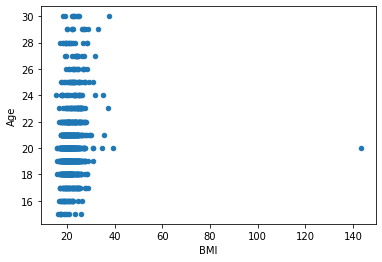

In [446]:
response_df.plot.scatter(x='BMI',y='Age')

Graph shows 14 outliers which is filtered below (BMI > 30)

In [447]:
BM = (response_df.BMI> 30)
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,BMI
42,5.0,5.0,2.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,...,170.0,90.0,0.0,female,right handed,secondary school,yes,city,block of flats,31.141869
151,5.0,4.0,3.0,1.0,1.0,3.0,2.0,2.0,4.0,4.0,...,180.0,100.0,1.0,male,right handed,secondary school,no,city,block of flats,30.864198
156,5.0,4.0,2.0,4.0,3.0,4.0,2.0,3.0,5.0,2.0,...,177.0,97.0,1.0,male,left handed,doctorate degree,yes,city,block of flats,30.961729
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow,35.444234
401,5.0,3.0,2.0,1.0,3.0,1.0,3.0,2.0,5.0,4.0,...,170.0,90.0,1.0,female,right handed,secondary school,no,village,block of flats,31.141869
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats,37.182261
636,5.0,3.0,3.0,5.0,4.0,3.0,3.0,4.0,4.0,1.0,...,171.0,93.0,2.0,male,right handed,doctorate degree,no,village,house/bungalow,31.804658
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow,143.080125
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow,33.145212
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow,35.062089


    e.	Are there respondents in this survey that are suspected to be outliers based on their BMI and Gender? How many? list them in a separate data frame.

Outliers are shown below. There are 28 outliers and each Gender category and BMI value are put in a new dataframe and response dataframe with the outliers are alsoshown below.

In [448]:
response_df.Gender.unique()

array(['female', 'male', nan], dtype=object)

<AxesSubplot:xlabel='BMI', ylabel='Gender'>

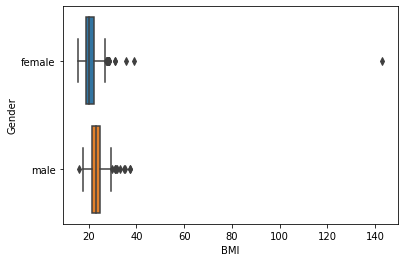

In [449]:
sns.boxplot(x=response_df.BMI,y=response_df.Gender)

In [450]:
outliers_list = [] #empty list
#iterate each education categiry, find the education and BMI outlier
#and add the dataframe with outliers to the list
for i in response_df.copy().Gender.unique():
    df_outlier = response_df.copy().sort_values(['Gender'])
    df_outlier = df_outlier.loc[df_outlier['Gender'] == i, :].reset_index(drop=True)
    df_outlier = df_outlier[['Gender', 'BMI']].set_index('Gender').apply(box_outliers)
    df_outlier = df_outlier.reset_index()
    outliers_list.append(df_outlier)

#create a dataframe from the list of outliers
outliers_df = pd.concat(outliers_list)
outliers_df.reset_index(drop=True)

,Gender,BMI
0,female,27.548209
1,female,143.080125
2,female,28.628792
3,female,28.548281
4,female,28.250970
5,female,28.040378
6,female,31.141869
7,female,27.755102
8,female,39.183673
9,female,27.774271


In [451]:
#get the new resonse dataframe with the ouliers
BM = [False] * len(response_df)
for i in range(0,len(outliers_df)):
        BM = BM | (response_df.Gender == outliers_df.iloc[i].Gender) & (response_df.BMI == outliers_df.iloc[i].BMI)
print(response_df[BM].shape)
response_df[BM].head()

(28, 151)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,BMI
42,5.0,5.0,2.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,...,170.0,90.0,0.0,female,right handed,secondary school,yes,city,block of flats,31.141869
88,5.0,5.0,5.0,1.0,1.0,5.0,2.0,5.0,5.0,1.0,...,164.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats,27.885187
145,1.0,4.0,4.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,...,165.0,78.0,1.0,female,right handed,secondary school,no,village,house/bungalow,28.650138
151,5.0,4.0,3.0,1.0,1.0,3.0,2.0,2.0,4.0,4.0,...,180.0,100.0,1.0,male,right handed,secondary school,no,city,block of flats,30.864198
156,5.0,4.0,2.0,4.0,3.0,4.0,2.0,3.0,5.0,2.0,...,177.0,97.0,1.0,male,left handed,doctorate degree,yes,city,block of flats,30.961729
